In [89]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [90]:
keras.backend.clear_session()
tf.random.set_seed(42)

In [91]:
def show_image(pixels):
    plt.imshow(pixels, cmap="binary")
    plt.axis("off")

# Load/prep data

In [92]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [93]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [94]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

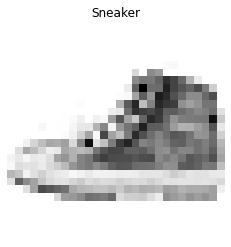

In [95]:
plt.imshow(X_train[2], cmap="binary")
plt.title(class_names[y_train[2]])
plt.axis('off')
plt.show()

# Create model

In [96]:
encoder = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(100, activation="selu"),
        keras.layers.Dense(30, activation="selu")])

In [97]:
decoder = keras.models.Sequential([
        keras.layers.Dense(100, activation="selu", input_shape=[30]),
        keras.layers.Dense(28*28, activation="sigmoid"),
        keras.layers.Reshape([28,28])
    ])

In [98]:
autoencoder = keras.models.Sequential([encoder, decoder])

In [99]:
autoencoder.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [100]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 30)                81530     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


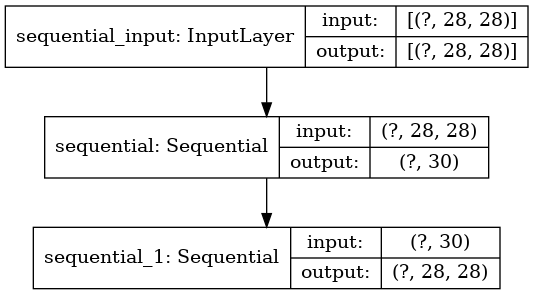

In [101]:
keras.utils.plot_model(autoencoder, 'autoencoder.png', show_shapes=True)

# Train model

In [104]:
def show_reconstructions(model, data, n_images=10):
    image_reconstruction = model.predict(data[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        show_image(data[image_index])

        plt.subplot(2, n_images, 1 + image_index + n_images)
        show_image(image_reconstruction[image_index])

### Before training

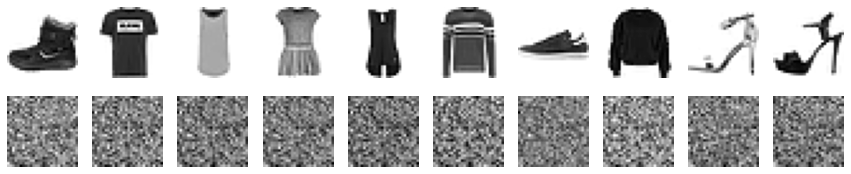

In [105]:
show_reconstructions(autoencoder, X_valid, 10)

In [106]:
autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3390 - val_loss: 0.3077
Epoch 2/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.3062 - val_loss: 0.2985
Epoch 3/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2994 - val_loss: 0.2947
Epoch 4/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2952 - val_loss: 0.2899
Epoch 5/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2927 - val_loss: 0.2894
Epoch 6/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2910 - val_loss: 0.2898
Epoch 7/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2897 - val_loss: 0.2863
Epoch 8/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2886 - val_loss: 0.2847
Epoch 9/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2876 - val_l

### Reconstruct images after a few epochs

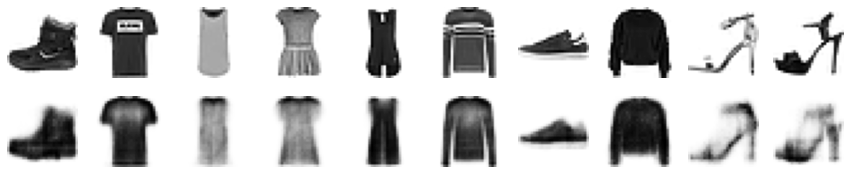

In [107]:
show_reconstructions(autoencoder, X_valid, 10)

In [108]:
autoencoder.fit(X_train, X_train, epochs=20, validation_data=[X_valid, X_valid])

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2861 - val_loss: 0.2822
Epoch 2/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2856 - val_loss: 0.2822
Epoch 3/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2850 - val_loss: 0.2833
Epoch 4/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2845 - val_loss: 0.2811
Epoch 5/20
55000/55000 [==============================] - 4s 64us/sample - loss: 0.2841 - val_loss: 0.2805
Epoch 6/20
55000/55000 [==============================] - 4s 64us/sample - loss: 0.2836 - val_loss: 0.2824
Epoch 7/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2833 - val_loss: 0.2802
Epoch 8/20
55000/55000 [==============================] - 4s 64us/sample - loss: 0.2829 - val_loss: 0.2798
Epoch 9/20
55000/55000 [==============================] - 4s 65us/sample - loss: 0.2826 - val_l

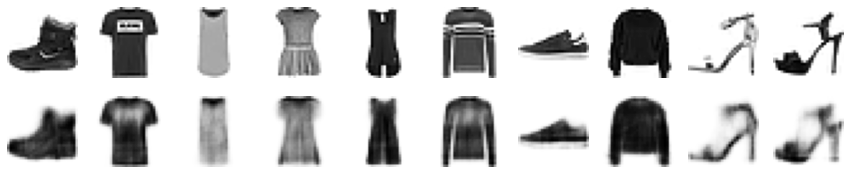

In [109]:
show_reconstructions(autoencoder, X_valid, 10)